# **Homework 4**
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW3_lastname_firstname.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission. 

**NOTE:** Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 03/14/2021 (Sunday).

Please ensure you follow all the steps mentioned in the homework.

Most questions have sample outputs to help you understand the question.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below - 

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name')) 

# New Section

Import all the libraries you require in the cell below.

In [45]:
# import all necessary libraries here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["axes.grid"] = False

frame = pd.read_csv('CommuteStLouis.csv')
frame.head()

,City,Age,Distance,Time,Sex
0,St. Louis,52,10,20,M
1,St. Louis,21,35,40,F
2,St. Louis,23,40,45,F
3,St. Louis,38,0,2,M
4,St. Louis,26,15,25,M


### 1. Create a statistical summary of the data in the file “CommuteStLouis.csv”. Plot a histogram of age for the CommuteStLouis data.

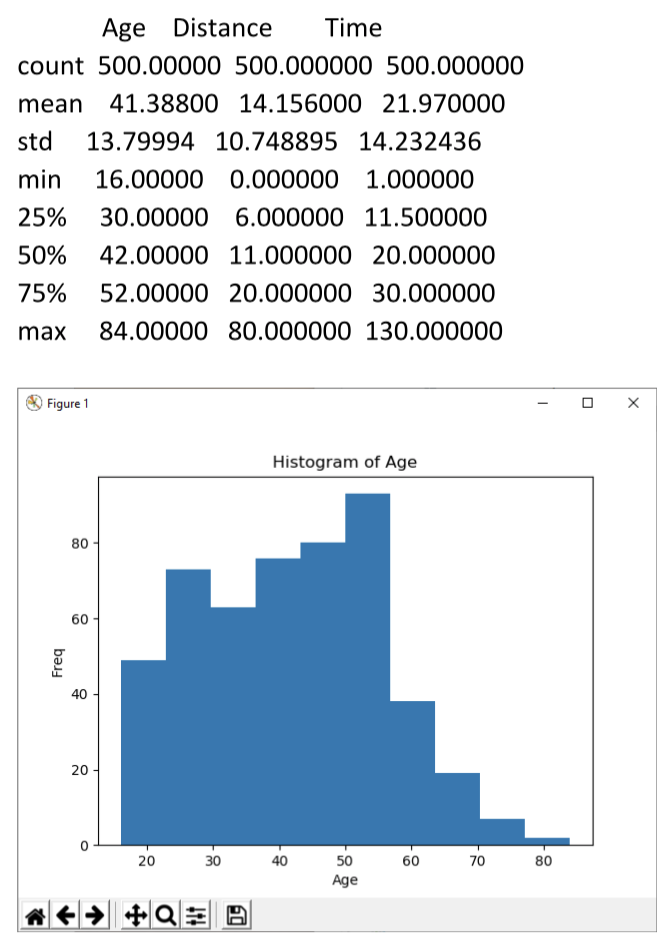

In [5]:
# Question 1 Summary
descriptionFrame = frame[["Age", "Distance", "Time"]]
descriptionFrame.describe(include='all')


,Age,Distance,Time
count,500.00000,500.000000,500.000000
mean,41.38800,14.156000,21.970000
std,13.79994,10.748895,14.232436
min,16.00000,0.000000,1.000000
25%,30.00000,6.000000,11.500000
50%,42.00000,11.000000,20.000000
75%,52.00000,20.000000,30.000000
max,84.00000,80.000000,130.000000


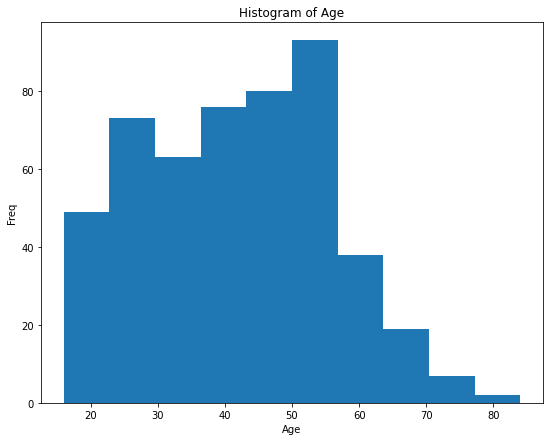

In [6]:
# Question 1 Histogram
fig=plt.figure(figsize=(9,7))
plt.hist(frame.loc[~frame['Age'].isnull(), 'Age'], bins=10)
plt.title('Histogram of Age')
plt.xlabel('Age', size=10)
plt.ylabel('Freq', size=10)
plt.rcParams["axes.grid"] = False



### 2. For the data CommuteStLouis:

a. Produce a correlation matrix of age, distance and time. Which two numeric variables are most highly correlated? What is the correlation coefficient for the above pair? Hint: If df is your dataframe then you can use print(df.corr()).

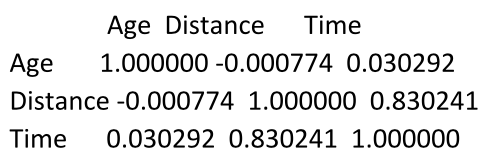

b. Create a scatterplot matrix of the numeric variables in the data. What do the figures in the diagonal going from the top left to the bottom right show? What can you say about the skewness of the various attributes?

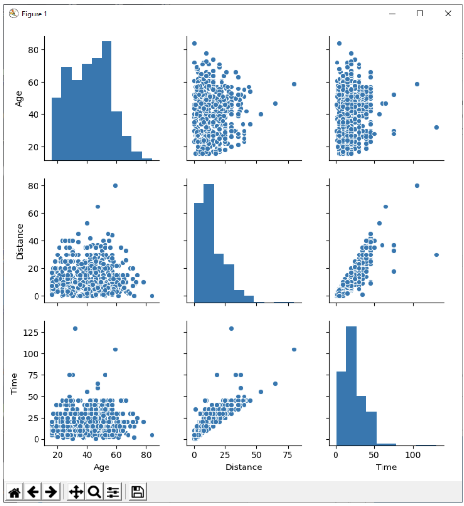

c. Produce a side-by-side boxplot of distance travelled by gender. Do the data in the file indicate that women tend to commute shorter distances?

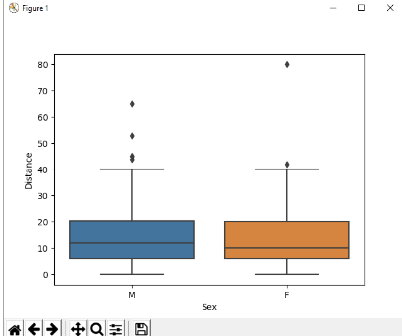

In [ ]:
# Question 2A
print(frame.corr())

#Distance and time are the most correlated (.83)

               Age  Distance      Time
Age       1.000000 -0.000774  0.030292
Distance -0.000774  1.000000  0.830241
Time      0.030292  0.830241  1.000000


(array([-50.,   0.,  50., 100., 150.]),
 <a list of 5 Text major ticklabel objects>)

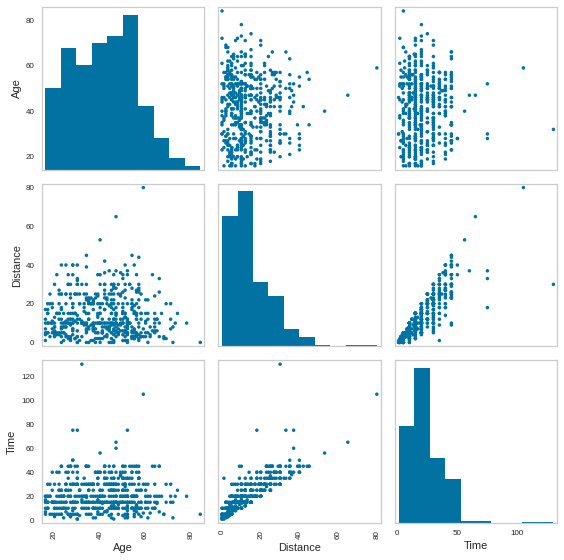

In [46]:
# Question 2B
#sns.pairplot(frame)


#print(frame.dtypes)
frameNum = frame.drop(['Sex', 'City'], axis=1)

#print(frameNum)

#sb.pairplot(frameNum, size=3)
#plt.show()


matrix = pd.plotting.scatter_matrix(frameNum, alpha=1.0, figsize= (8, 8))
plt.tight_layout()
plt.xticks(rotation=360)



#The figures on the diagonal left to right corner are the graphs plotting the same variable against themselves. 
#In the top left, age is plotted against age, then distance X distance, then time X time. These are exactly correlated (1)
# because they are the same variables.
# In general, it's difficult to infer what skewness is happening for each chart because of overplotting. In each plot
# there is a large conglomeration of dots which could be hiding
# the true data pattern thus you have to be cautious in describing the data's skewness.
#The data time appear to be skewed positively, showing when distance increases time also increases. 
#However, it's important to consider that over-plotting may be at play and skewness cannot be inferred.
#The massive amount of dots near low time low distance (where most of the datapoints are) could be hiding a more neutral or negative skewness.



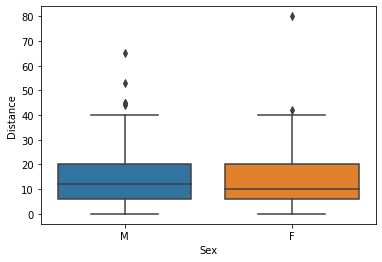

In [39]:
#2c
ax = sb.boxplot(x="Sex", y="Distance", data=frame)

#This shows women tend to commute lower distances. In the boxplot, you can see in the interquartile range
# from the 25th to the 50th percentile, the data for Females are more condensed in smaller values, where as the 
# male box plot is more distributed evently throughout the IQR. This shows overall more lower values in this region
# and indicates females may travel shorter distances in this set. 

### 3. For the pair in Question 2.a plot the scatter plot. Also superimpose a linear regression line on the plot.

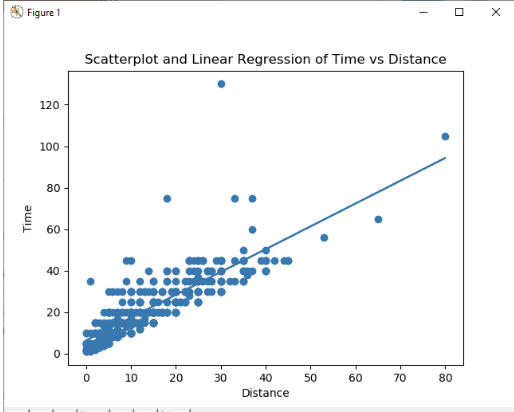

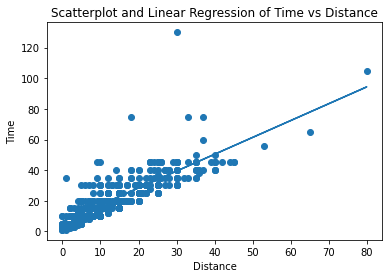

In [40]:
x = frame['Distance']
y = frame['Time']
m, b = np.polyfit(x, y, 1)
plt.plot(x, b + m * x, '-')
plt.title('Scatterplot and Linear Regression of Time vs Distance')
plt.xlabel('Distance')
plt.ylabel('Time')

plt.scatter(x, y)

### 4. Show the distribution of residuals of the data from Part 3.

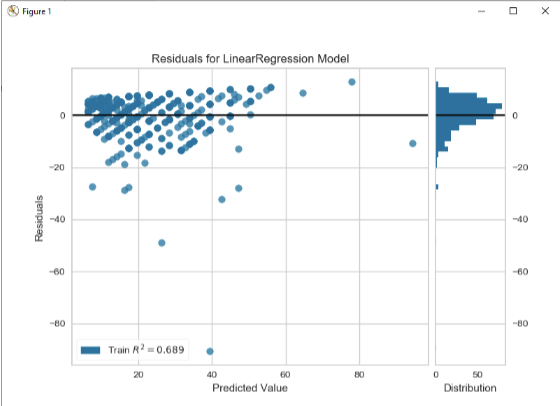

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


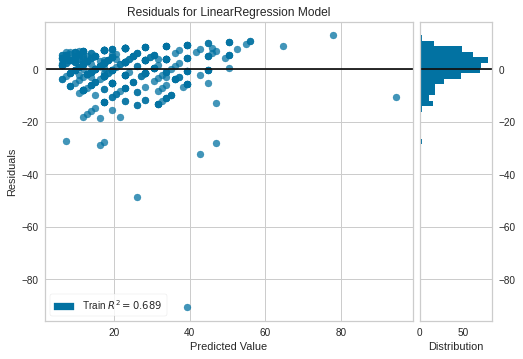

In [42]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


x = frame['Distance'].values
X = x.reshape(-1, 1)
y = frame['Time']
ridge = Ridge()
model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X, y)
visualizer.poof()
